In [1]:
import os

os.add_dll_directory(
    "C:\\Users\\ospin\\miniconda3\\envs\\xhydro-dev\\julia_env\\pyjuliapkg\\install\\bin"
)

import glob
import os

import eau_precpitable_CanESM5
from xarray import open_zarr

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Basic imports
try:
    from xhydro.extreme_value_analysis import Extremes, jl
    from xhydro.extreme_value_analysis.parameterestimation import *

    has_julia = True
except ImportError:
    print(
        "This notebook requires the `julia` programming language and the `juliacall` Python package to be installed."
    )
    has_julia = False

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

# warnings.simplefilter("always", UserWarning)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Données

<xarray.Dataset> Size: 27kB
Dimensions:             (time: 226, point: 28)
Coordinates:
    height              float64 8B 2.0
  * time                (time) int64 2kB 1925 1926 1927 1928 ... 2148 2149 2150
  * point               (point) int32 112B 1 2 3 4 5 6 7 ... 23 24 25 26 27 28
Data variables:
    precipitable_water  (point, time) float32 25kB 47.03 48.64 ... 96.48 122.3

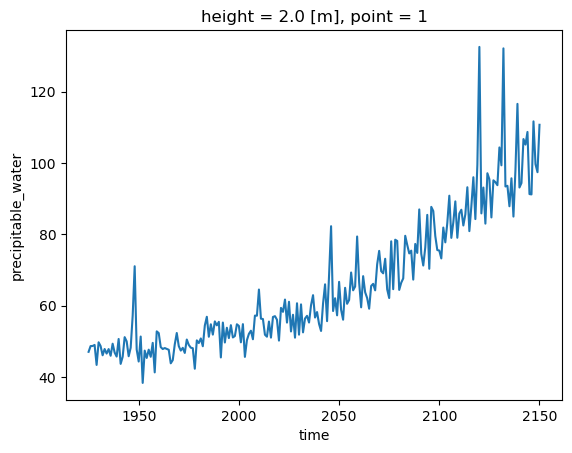

In [2]:
path_hist = glob.glob(os.path.join(eau_precpitable_CanESM5.__path__[0]))
da = open_zarr(path_hist[0], consolidated=True)

# Resample the data and update the time coordinate as before
da = da.resample(time="Y").max().compute()
da["time"] = da["time.year"]

da = da.stack(point=("y", "x"))
da = da.assign_coords(point=np.arange(1, da.sizes["point"] + 1))
da = da.transpose("point", "time")
da.precipitable_water[0, :].plot()
da

## Estimation de paramètres - Stationnaire

In [3]:
params = fit(
    da,
    dist="genextreme",
    method="ml",
    vars=["precipitable_water"],
    confidence_level=0.9,
)
params = params.transpose("point", "dparams")
params

<xarray.Dataset> Size: 2kB
Dimensions:                   (point: 28, dparams: 3)
Coordinates:
    height                    float64 8B 2.0
  * point                     (point) int32 112B 1 2 3 4 5 6 ... 24 25 26 27 28
  * dparams                   (dparams) <U5 60B 'shape' 'loc' 'scale'
Data variables:
    precipitable_water        (point, dparams) float64 672B 0.2769 ... 12.29
    precipitable_water_lower  (point, dparams) float64 672B 0.1625 ... 10.92
    precipitable_water_upper  (point, dparams) float64 672B 0.3913 ... 13.83
Attributes:
    long_name:    genextreme parameters
    description:  Parameters of the genextreme distribution
    method:       ML
    estimator:    Maximum likelihood
    scipy_dist:   genextreme
    units:        
    history:      [2024-10-25 15:21:09] fit: Estimate distribution parameters...

## Estimation de paramètres - Non-Stationnaire

In [4]:
params = fit(
    da,
    dist="genextreme",
    method="ml",
    vars=["precipitable_water"],
    locationcov=["time"],
)
params = params.transpose("point", "dparams")
params

<xarray.Dataset> Size: 3kB
Dimensions:                   (point: 28, dparams: 4)
Coordinates:
    height                    float64 8B 2.0
  * point                     (point) int32 112B 1 2 3 4 5 6 ... 24 25 26 27 28
  * dparams                   (dparams) <U18 288B 'shape' 'loc' ... 'scale'
Data variables:
    precipitable_water        (point, dparams) float64 896B 0.0309 ... 7.034
    precipitable_water_lower  (point, dparams) float64 896B -0.05747 ... 6.322
    precipitable_water_upper  (point, dparams) float64 896B 0.1193 ... 7.828
Attributes:
    long_name:    genextreme parameters
    description:  Parameters of the genextreme distribution
    method:       ML
    estimator:    Maximum likelihood
    scipy_dist:   genextreme
    units:        
    history:      [2024-10-25 15:21:11] fit: Estimate distribution parameters...

## Niveau de retour - Données

In [5]:
data = Extremes.dataset("fremantle")

# Creating the DataFrame
data = {
    "Year": [
        1897,
        1898,
        1899,
        1900,
        1901,
        1903,
        1904,
        1905,
        1906,
        1908,
        1909,
        1912,
        1914,
        1915,
        1916,
        1917,
        1918,
        1919,
        1920,
        1921,
        1922,
        1923,
        1924,
        1925,
        1927,
        1928,
        1929,
        1930,
        1931,
        1932,
        1933,
        1934,
        1935,
        1936,
        1937,
        1938,
        1939,
        1940,
        1941,
        1943,
        1944,
        1945,
        1946,
        1947,
        1948,
        1949,
        1950,
        1951,
        1952,
        1953,
        1954,
        1955,
        1956,
        1957,
        1958,
        1959,
        1960,
        1961,
        1962,
        1963,
        1964,
        1965,
        1966,
        1967,
        1968,
        1969,
        1970,
        1971,
        1972,
        1973,
        1974,
        1975,
        1976,
        1977,
        1978,
        1979,
        1980,
        1981,
        1982,
        1983,
        1984,
        1985,
        1986,
        1987,
        1988,
        1989,
    ],
    "SeaLevel": [
        1.58,
        1.71,
        1.4,
        1.34,
        1.43,
        1.19,
        1.55,
        1.34,
        1.37,
        1.46,
        1.92,
        1.37,
        1.19,
        1.4,
        1.28,
        1.52,
        1.52,
        1.58,
        1.49,
        1.65,
        1.37,
        1.49,
        1.46,
        1.34,
        1.74,
        1.62,
        1.46,
        1.71,
        1.74,
        1.55,
        1.43,
        1.62,
        1.49,
        1.58,
        1.34,
        1.37,
        1.62,
        1.31,
        1.43,
        1.49,
        1.55,
        1.71,
        1.49,
        1.46,
        1.52,
        1.58,
        1.65,
        1.49,
        1.52,
        1.52,
        1.49,
        1.62,
        1.86,
        1.58,
        1.62,
        1.46,
        1.43,
        1.46,
        1.62,
        1.68,
        1.83,
        1.62,
        1.46,
        1.58,
        1.77,
        1.62,
        1.71,
        1.46,
        1.6,
        1.5,
        1.6,
        1.9,
        1.7,
        1.4,
        1.8,
        1.37,
        1.46,
        1.61,
        1.43,
        1.67,
        1.62,
        1.57,
        1.56,
        1.46,
        1.7,
        1.51,
    ],
    "SOI": [
        -0.67,
        0.57,
        0.16,
        -0.65,
        0.06,
        0.47,
        0.39,
        -1.78,
        0.2,
        0.28,
        0.28,
        -0.97,
        -0.92,
        0.16,
        0.62,
        2.12,
        0.05,
        -1.09,
        0.08,
        0.66,
        0.33,
        -0.36,
        0.33,
        -0.24,
        0.27,
        0.43,
        0.46,
        0.03,
        0.39,
        -0.68,
        0.09,
        -0.01,
        0.14,
        0.03,
        0.09,
        0.86,
        0.02,
        -1.52,
        -1.44,
        0.35,
        -0.27,
        0.42,
        -0.79,
        0.16,
        -0.24,
        -0.21,
        1.49,
        -0.69,
        -0.23,
        -0.76,
        0.23,
        0.89,
        1.0,
        -0.45,
        -0.5,
        -0.11,
        0.28,
        -0.01,
        0.38,
        -0.32,
        0.53,
        -0.97,
        -0.53,
        0.25,
        0.19,
        -0.66,
        0.28,
        1.06,
        -0.88,
        0.63,
        0.97,
        1.32,
        0.06,
        -1.13,
        -0.3,
        -0.08,
        -0.43,
        0.06,
        -1.44,
        -0.94,
        -0.14,
        -0.07,
        -0.32,
        -1.47,
        0.73,
        0.61,
    ],
}

df = pd.DataFrame(data)

# Converting DataFrame to xarray.Dataset
ds = xr.Dataset(
    {"SeaLevel": ("time", df["SeaLevel"]), "SOI": ("time", df["SOI"])},
    coords={"time": df["Year"]},
)

ds

<xarray.Dataset> Size: 2kB
Dimensions:   (time: 86)
Coordinates:
  * time      (time) int64 688B 1897 1898 1899 1900 1901 ... 1986 1987 1988 1989
Data variables:
    SeaLevel  (time) float64 688B 1.58 1.71 1.4 1.34 1.43 ... 1.56 1.46 1.7 1.51
    SOI       (time) float64 688B -0.67 0.57 0.16 -0.65 ... -1.47 0.73 0.61

## Niveau de retour - Stationnaire

In [6]:
return_level_stat = return_level(
    ds, dist="genextreme", method="ml", return_period=1000, vars=["SeaLevel"]
)
return_level_stat

<xarray.Dataset> Size: 72B
Dimensions:         (return_level: 1)
Coordinates:
  * return_level    (return_level) <U12 48B 'return_level'
Data variables:
    SeaLevel        (return_level) float64 8B 1.987
    SeaLevel_lower  (return_level) float64 8B 1.851
    SeaLevel_upper  (return_level) float64 8B 2.124
Attributes:
    long_name:    genextreme parameters
    description:  Parameters of the genextreme distribution
    method:       ML
    estimator:    Maximum likelihood
    scipy_dist:   genextreme
    units:        
    history:      [2024-10-25 15:21:14] fit: Estimate distribution parameters...

## Niveau de retour - Non-Stationnaire

In [7]:
return_level_nstat = return_level(
    ds,
    dist="genextreme",
    method="ml",
    return_period=1000,
    vars=["SeaLevel"],
    locationcov=["time", "SOI"],
)
return_level_nstat

<xarray.Dataset> Size: 3kB
Dimensions:         (return_level: 86)
Coordinates:
  * return_level    (return_level) int64 688B 1897 1898 1899 ... 1987 1988 1989
Data variables:
    SeaLevel        (return_level) float64 688B 1.867 1.937 ... 2.136 2.131
    SeaLevel_lower  (return_level) float64 688B 1.699 1.78 1.758 ... 1.957 1.951
    SeaLevel_upper  (return_level) float64 688B 2.035 2.093 ... 2.315 2.311
Attributes:
    long_name:    genextreme parameters
    description:  Parameters of the genextreme distribution
    method:       ML
    estimator:    Maximum likelihood
    scipy_dist:   genextreme
    units:        
    history:      [2024-10-25 15:21:16] fit: Estimate distribution parameters...

In [8]:
return_level_nstat["SeaLevel_lower"].values

array([1.69904335, 1.78016091, 1.75766965, 1.70681778, 1.75568068,
       1.78490566, 1.7822497 , 1.63533987, 1.77489844, 1.78395342,
       1.78602258, 1.70950455, 1.71713701, 1.79093581, 1.8204756 ,
       1.89853419, 1.79012581, 1.71515556, 1.79601222, 1.83279207,
       1.81536014, 1.77360309, 1.8193107 , 1.78544719, 1.82155304,
       1.8331224 , 1.83684045, 1.81251646, 1.83654026, 1.76958708,
       1.82204965, 1.81767693, 1.82897526, 1.82400662, 1.82965862,
       1.87692144, 1.82904081, 1.72480721, 1.73261704, 1.85679823,
       1.81976898, 1.86466942, 1.78846881, 1.8526004 , 1.82909194,
       1.83286538, 1.93215742, 1.80454039, 1.83701801, 1.80337199,
       1.8695624 , 1.90967227, 1.91745945, 1.8315532 , 1.83000366,
       1.85724808, 1.88323672, 1.86710309, 1.89274049, 1.85073002,
       1.90505704, 1.81021041, 1.8420846 , 1.89358713, 1.89165253,
       1.83854001, 1.90053852, 1.94670327, 1.82865176, 1.92621918,
       1.94690272, 1.96710504, 1.8972215 , 1.81973342, 1.87773

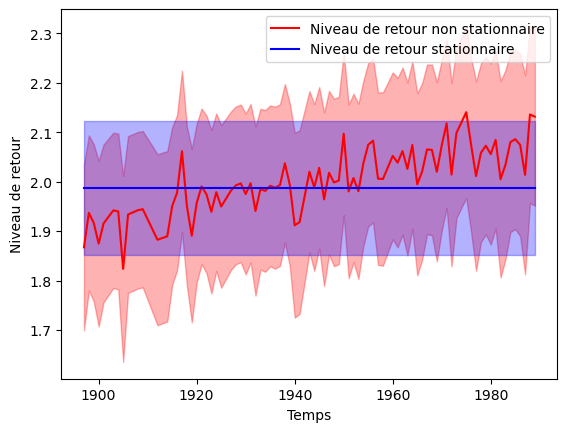

In [9]:
y_nstat = return_level_nstat.SeaLevel[:].values
y_stat = [return_level_stat.SeaLevel[:].values for i in range(len(y_nstat))]

x = ds.time
plt.plot(x, y_nstat, color="red", label="Niveau de retour non stationnaire")
plt.fill_between(
    x,
    return_level_nstat["SeaLevel_lower"].values,
    return_level_nstat["SeaLevel_upper"].values,
    color="red",
    alpha=0.3,
)
plt.plot(x, y_stat, color="blue", label="Niveau de retour stationnaire")
plt.fill_between(
    x,
    return_level_stat["SeaLevel_lower"].values,
    return_level_stat["SeaLevel_upper"].values,
    color="blue",
    alpha=0.3,
)

plt.xlabel("Temps")
plt.ylabel("Niveau de retour")
plt.legend()
plt.show()